In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

<i>In the report, the company mentioned is ficticious.  This notebook is for Thinkful's Data Science Experimental Design capstone.</i>

# INTRODUCTION

There are three main ways to earn revenue from a mobile applications<sup><a href="#ref">1</a></sup>:<br>
1) Sell the app for some monitary value, <br>
2) Publish the app for free but use an in-app advertising service to make money, or <br>
3) Offer a subscription service or in-app purchases. <br>

Since the company is working on a stand alone application, not one with in app purchases or purchasable services, the first two are the main options for earning revenue.
In addition, with the majority of most apps found in stores being free<sup><a href="#ref">2</a></sup>, it seems like option 2, make the app free but ad-enabled, is best.  However as the company is concerned having ads may be detrimental to ratings, leading to fewer downloads and hence less revenue, I am conducting this research project to determine if free apps with ad support in general have lower ratings than paid apps without ads.  As someone who dislikes in-app ads, this subject interests me as well.

Upon completion of the research I will ofter my advice to the company as to wether to publish the app for free, with ads, or sell the app in the Google Play Store.

## Research Question: Do free apps with advertisements enabled, on average, get lower ratings than paid apps without ads?

# HYPOTHESIS

$H_{0}$: $\bar{X}_{Ratings, free} = \bar{X}_{Ratings, paid}$<br>
$H_{A}$: $\bar{X}_{Ratings, paid} - \bar{X}_{Ratings, free} > 0$

The null hypothesis, $H_{0}$, states there is no difference in average ratings betweeen ad-enabled free apps and paid apps. If the study fails to reject this, the company should publish the mobile application for free, with ads enabled, as free apps get more downloads.

The alternate hypothesis, $H_{A}$, states that paid apps, in general, have higher ratings than free apps with ads.  If this is indeed the case, I can analyze how much higher the ratings are, on average, and suggest which avenue to pursue, free or paid, or suggest further research, if needed, to assist the company in making their decision.

# DATA

## Dataset Information

For the research I chose the availabe Kaggle dataset Google Play Store Apps.  I chose this dataset as it was the largest, most up to date, comprehensive set I could find on app store data.  The dataset can be found here:
https://www.kaggle.com/gauthamp10/google-playstore-apps

In order to run the cells in this notebook, please download it.

The dataset contains 2,312,944 data points and 24 variables.  The variable of most interest is the floating point column 'Rating'.  It holds the average rating for each app and will be used as the dependent variable for this study.  Other variables used in the analysis are: 'Rating Count', 'Maximum Installs', 'Free', 'Ad Supported', and 'In App Purchases'.

In [2]:
df = pd.read_csv('..\data\Google-Playstore.csv')

Below you can see a list of the variables along with their associated data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [8]:
print("Number of rows with missing values: ",df.shape[0] - df.dropna().shape[0])
print("Number of missing values in 'Rating': ", sum(df.Rating.isnull()))

Number of rows with missing values:  1025753
Number of missing values in 'Rating':  22883


The dataset contains 1,025,753 records with missing values.  The 'Rating' column contains 22,883 missing values.  When doing the statistical analysis, missing values will be dropped.

Below, the first five rows of the dataset can be viewed.

In [12]:
df.head(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## Data preprocessing

As the study has to do with ratings, first I filtered for observations with a rating count greater than 0.

In [3]:
df = df[df['Rating Count']>0]

Looking at installs:

In [4]:
df.Installs.unique()

array(['5,000+', '10+', '1,000+', '500+', '50,000+', '100+', '10,000+',
       '50+', '500,000+', '100,000+', '10,000,000+', '1,000,000+',
       '5,000,000+', '5+', '100,000,000+', '0+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '1+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [5]:
df['Maximum Installs'].describe()

count    1.230299e+06
mean     6.003751e+05
std      3.229278e+07
min      0.000000e+00
25%      1.267000e+03
50%      5.634000e+03
75%      3.349600e+04
max      1.205763e+10
Name: Maximum Installs, dtype: float64

The number of installs range from 0 installs to over 10 billion installs with the mean number of installs being around 600,000.  Apps that are only installed a few times will vary greatly from apps that are installed more than a million times.  To reduce bias, I filtered the dataset to only include apps installed at least ten thousand times. 

In [6]:
df = df[df['Maximum Installs']>=10000]

I then split the dataset into two sets, once containing free apps with ads enabled, the other consisting of paid apps withut ads.

In [7]:
df_free = df[df.Free==True]
df_free = df_free[df_free['Ad Supported']==True]
df_paid = df[df.Free==False]
df_paid = df_paid[df_paid['Ad Supported']==False]
print('The number of entries in the free subset: ', df_free.shape[0])
print('The number of entries in the paid subset: ', df_paid.shape[0])

The number of entries in the free subset:  345410
The number of entries in the paid subset:  5018


Finally, as the size of the free subset greatly exceeds that for the paid subset, I chose a random sample of 2,500 entries for each set.  Having an equal amount of entries will simplify comparisons later in the analysis. 

In [8]:
df_free = df_free.sample(n = 2500)
df_paid = df_paid.sample(n = 2500)

# METHODS

To determine if, on average, free apps with ads get lower ratings than paid apps I will perform a one sided t-test comparing the means of the average ratings.  

## Conditions for a t-test

In order to perform a t-test the data needs to be independent and normally distributed.  As each data point represents a different app, independence can be reasonably assumed.  To test for normality, I will first view a histogram of each Ratings column.

<AxesSubplot:>

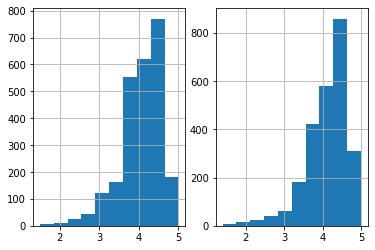

In [9]:
fig, axes = plt.subplots(1, 2)
df_free.Rating.hist(ax=axes[0])
df_paid.Rating.hist(ax=axes[1])

The figure on the left is the distribution for the free subset while the figure on the right is the distribution for the paid subset.  As seen, the distributions are similar but clearly not normal as there is a strong left skew.  

In order to make the data more normal, I will apply a transformation of cubing the ratings column in each data subset.

<AxesSubplot:>

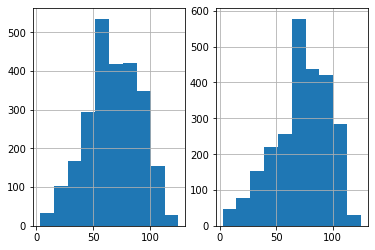

In [18]:
df_free['Ratings_cubed'] = df_free.Rating**3
df_paid['Ratings_cubed'] = df_paid.Rating**3
fig, axes = plt.subplots(1, 2)
df_free.Ratings_cubed.hist(ax=axes[0])
df_paid.Ratings_cubed.hist(ax=axes[1])

The transformation makes the distribution appear more normal.  Next the statistical values of skew and kurtosis will be measured for each to check for normality.

In [31]:
stats_free = stats.describe(df_free.Ratings_cubed)
stats_paid = stats.describe(df_paid.Ratings_cubed)
df_normal = pd.DataFrame([['Skew',stats_free.skewness,stats_paid.skewness],
['Kurtosis',stats_free.kurtosis,stats_paid.kurtosis]])
df_normal.columns = ['Trait','Free apps','Paid apps']
df_normal

,Trait,Free apps,Paid apps
0,Skew,-0.251492,-0.463689
1,Kurtosis,-0.317709,-0.236118


Although skew is still apparent from the visualization, the values calculated (shown above) indicate normality, making a t-test for difference of means possible.

## Evaluating Bias

There are a lot of factors that could possibly effect ratings
* The category of the app
* The number of downloads
* The size and experience of the development team
* The design of the user interface
* How often updates are pushed
* Whether or not bugs are apparent

These are just a few factors.  Having taken a random sample of apps will hopefully deter bias.  However a statistical test, know as an A/A test was conducted to check for bias.  The code can be found [here](#aa). No bias is apparant.

## The t-test

In [32]:
stats.ttest_ind(df_free.Ratings_cubed.dropna(),df_paid.Ratings_cubed.dropna(),alternative='less')

Ttest_indResult(statistic=-6.438201762485287, pvalue=6.611201281202598e-11)

# RESULTS

From the statistical test the p value indicates that it is extremely rare to see a difference of means this or more extreme.  At a 5% significance level there is enough evidence to reject the null hypothesis and favor the alternative hypothesis.  Statistically, free apps with ads enabled get lower ratings than paid apps.  

As ratings are not normally distributed, a confidence interval for the difference of means cannot be calculated.  However a statistical method called bootstrapping can be used to derive a confidence interval.  I used bootstrapping to come up with a confidence interval.  The code can be found [here](#bs).

The 95% confidence interval for the difference of means is:

(0.0611, 0.0619)

95% of the time, the difference of average ratings for paid apps and free apps with ads will fall within this interval.
So most of the time the difference between average ratings is less than 0.1 stars.


To hekp visualize the differences in average ratings, I'm going to create a column that is Rating rounded to the nearest half point.  Then I will create a bar chart of counts

<AxesSubplot:xlabel='Average Rating'>

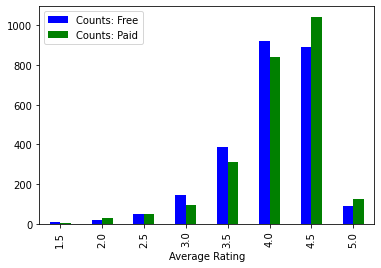

In [21]:
df_free['Ratings Rounded'] = (df_free.Rating*2).round()/2
df_paid['Ratings Rounded'] = (df_paid.Rating*2).round()/2
df_free_counts = df_free.groupby('Ratings Rounded').count().Rating.reset_index()
df_free_counts.columns = ['Average Rating','Counts: Free']
df_counts = df_paid.groupby('Ratings Rounded').count().Rating.reset_index()
df_counts.columns = ['Average Rating','Counts: Paid']
df_counts['Counts: Free'] = df_free_counts['Counts: Free']
df_counts[['Average Rating','Counts: Free','Counts: Paid']].plot.bar(x='Average Rating',color={'Counts: Free':'blue','Counts: Paid':'green'})

As you can see, free apps with ads enabled have more 3, 3.5, and 4 star ratings, whereas paid apps have more 4.5 and 5 star ratings.  It is also intresting to note that paid apps have more 2 star ratings.

# DISCUSSION AND RECOMMENDATIONS

Statistically, there is a difference between ratings of free apps and paid apps.  However that difference is so miniscule, I would suggest publishing the mobile app for free with ads enabled.  Further options for research include conducting sentiment analysis on the reviews of apps to see if ad-supported free app reviews are more negative than paid apps.  There is also the possibility to do an experiment with 2 versions of the app, one free, ad-enabled, and one paid, without ads, to see which one brings more profit and in the future remove the less profitable app.

<a id='ref'></a>
# References

<ol><li>Choose a monetization model for your app. 2021. Google. <a href="https://developer.android.com/distribute/best-practices/earn/monetization-options">https://developer.android.com/distribute/best-practices/earn/monetization-options</a> last accessed July 5, 2021</li>
    <li>How mobile developers make money from free apps. 2021. ONIX. <a href="https://onix-systems.com/blog/how-mobile-developers-make-money-from-free-apps">https://onix-systems.com/blog/how-mobile-developers-make-money-from-free-apps</a> last accessed July 5, 2021</li>
</ol>



# Appendix

<a id='aa'></a>
## A/A testing for bias

In [25]:
df_free_a = df_free.sample(frac = 0.5)
df_free_b = df_free.drop(df_free_a.index)
stats.ttest_ind(df_free_a.Ratings_cubed.dropna(), df_free_b.Ratings_cubed.dropna())

Ttest_indResult(statistic=0.8442126503860155, pvalue=0.3986314258375284)

In [27]:
df_paid_a = df_paid.sample(frac = 0.5)
df_paid_b = df_paid.drop(df_paid_a.index)
stats.ttest_ind(df_paid_a.Ratings_cubed.dropna(), df_paid_b.Ratings_cubed.dropna())

Ttest_indResult(statistic=0.9413851233349498, pvalue=0.34659856044668713)

<a id='bs'></a>
## Bootsrapping for the confidence interval

In [15]:
import math

means = []
df_boots = pd.concat([df_free,df_paid])
for _ in range(10000):
    df_rand = df_boots.sample(n=5000,replace=True)
    df_rand_free = df_rand[df_rand.Free==True]
    df_rand_paid = df_rand[df_rand.Free==False]
    mu1 = df_rand_paid.Rating.mean()
    mu2 = df_rand_free.Rating.mean()
    means.append(mu1-mu2)
mu = np.mean(means)
s = np.std(means)
sqrt_n = math.sqrt(5000)
a = mu - 1.96*s/sqrt_n
b = mu + 1.96*s/sqrt_n
print('(',a,', ',b,')')

( 0.06105112390288702 ,  0.06188761592257077 )
